In [1]:
import math as m
import matplotlib.pyplot as plt
import numpy as np
import copy


## Аналитическое решение

In [2]:
n = 20
x = np.linspace(0,m.pi/2,n)
y = np.linspace(0,m.pi/2,n)
h = m.pi/n/2
x_plt, y_plt = np.meshgrid(x, y)

In [3]:
def isxF(x,y):
    u = [0]*len(x)
    for i in range(len(y)):
        u[i] = [0]*len(y)
    for i in range(len(x)):
        for j in range(len(y)):
            u[i][j] = np.exp(-y[j])*np.cos(x[i])*np.cos(y[j])

    return u

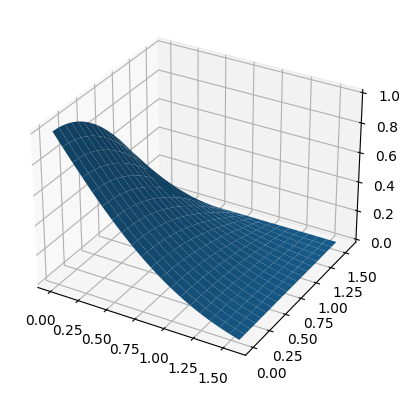

In [4]:
U = isxF(x,y)
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(x_plt,y_plt,np.array(U))
plt.show()

## Метод Любмана

In [5]:
def Libman(n):
    u = [0]*len(x)
    for i in range(len(y)):
        u[i] = [0]*len(y)

    for i in range(n):
        u[i][0] = np.cos(x[i])
        u[i][-1] = 0
        u[0][i] = np.exp(-y[i])*np.cos(y[i])
        u[-1][i] = 0
        for j in range(1,n-1):
            u[j][i] = u[0][i] - x[j]*(u[-1][i]-u[0][i])/m.pi/2

    U = copy.deepcopy(u)

    u1 = np.zeros((n,n))

    norma = 1
    eps = 0.0001
    while(norma > eps):
        for i in range(1,n-1):
            for j in range(1,n-1):
                U[i][j] = (-u[i+1][j]-u[i-1][j]+(-1-2*h)*u[i][j+1]-u[i][j-1])/(-4-2*h+3*h**2)

        for i in range(n):
            for j in range(n):
                u1[i,j] = np.abs(U[i][j] - u[i][j])

        norma = u1.max()
        #print(norma)
        #print(u1)
        u = copy.deepcopy(U)

    return u

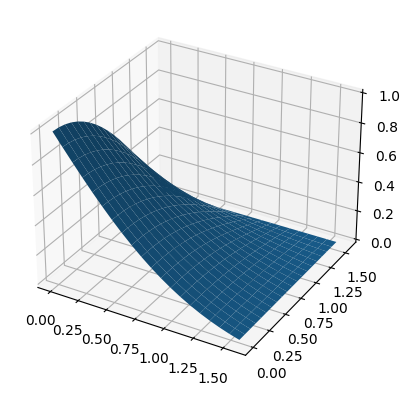

In [6]:
U1 = Libman(n)
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(x_plt,y_plt,np.array(U1))
plt.show()

## Метод Зейделя

In [7]:
def relaxation(n,omega):
    u = [0]*len(x)
    for i in range(len(y)):
        u[i] = [0]*len(y)

    for i in range(n):
        u[i][0] = np.cos(x[i])
        u[i][-1] = 0
        u[0][i] = np.exp(-y[i])*np.cos(y[i])
        u[-1][i] = 0
        for j in range(1,n-1):
            u[j][i] = u[0][i] - x[j]*(u[-1][i]-u[0][i])/m.pi/2


    u1 = np.zeros((n,n))

    norma = 1
    eps = 0.0001
    while(norma > eps):
        U = copy.deepcopy(u)
        for i in range(1,n-1):
            for j in range(1,n-1):
                u[i][j] += omega * ((u[i-1][j] + U[i+1][j] + u[i][j-1] + U[i][j+1]) / 4 - U[i][j])

        for i in range(n):
            for j in range(n):
                u1[i,j] = np.abs(U[i][j] - u[i][j])

        norma = u1.max()

    return u

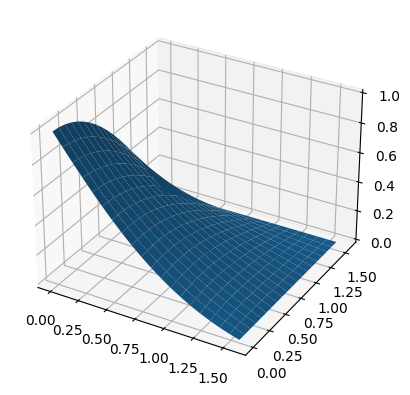

In [8]:
U2 = relaxation(n,1)
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(x_plt,y_plt,np.array(U2))
plt.show()

## Метод верхней релаксации

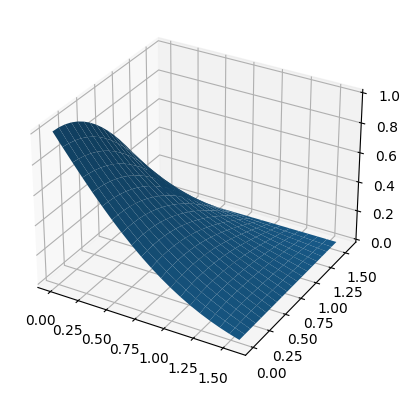

In [9]:
U3 = relaxation(n,1.5)
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(x_plt,y_plt,np.array(U3))
plt.show()